In [107]:
import pandas as pd
import json
import csv
import numpy as np
import matplotlib.pyplot as plt

with open('resolver_geolocation_data.json') as json_file:
    jsondata = json.load(json_file)

In [108]:
r = pd.read_json('resolver_geolocation_data.json')
r.head(20)

,resolver,IP_address,country_iso_code,country_name,city_name
0,https://dns.google/dns-query,8.8.8.8,US,United States,None
1,https://dns.aa.net.uk/dns-query,51.158.166.97,FR,France,Paris
2,https://adfree.usableprivacy.net/dns-query,149.154.153.153,AT,Austria,Vienna
3,https://dns.adguard.com/dns-query,94.140.14.14,CY,Cyprus,None
4,https://dns-family.adguard.com/dns-query,176.103.130.132,RU,Russia,None
5,https://doh.in.ahadns.net/dns-query,45.79.120.233,IN,India,Mumbai
6,https://doh.la.ahadns.net/dns-query,45.67.219.208,US,United States,Los Angeles
7,https://doh.nl.ahadns.net/dns-query,5.2.75.75,NL,Netherlands,None
8,https://dns.alidns.com/dns-query,223.5.5.5,CN,China,Hangzhou
9,https://dnsnl-noads.alekberg.net/dns-query,51.15.124.208,NL,Netherlands,Amsterdam


In [109]:
r['country_name'].unique()

array(['United States', 'France', 'Austria', 'Cyprus', 'Russia', 'India',
       'Netherlands', 'China', None, 'Spain', 'Luxembourg', 'Japan',
       'Australia', 'Czechia', 'Switzerland', 'United Kingdom', 'Canada',
       'Finland', 'Germany', 'Singapore', 'Indonesia', 'Sweden',
       'Denmark'], dtype=object)

In [110]:
ip_europe = r[(r['country_name']=='France') | (r['country_name']=='Austria') | (r['country_name']=='Russia') | (r['country_name']=='Netherlands') | (r['country_name']=='Spain') | (r['country_name']=='Luxembourg') | (r['country_name']=='Czechia')  | (r['country_name']=='Switzerland')  | (r['country_name']=='United Kingdom')  | (r['country_name']=='Finland')  | (r['country_name']=='Germany')  | (r['country_name']=='Sweden')  | (r['country_name']=='Denmark')]

In [111]:
ip_europe.describe()

,resolver,IP_address,country_iso_code,country_name,city_name
count,25,25,25,25,13
unique,24,23,13,13,9
top,https://dns.digitale-gesellschaft.ch/dns-query,51.15.124.208,NL,Netherlands,Helsinki
freq,2,2,4,4,3


In [112]:
ip_europe.head()

,resolver,IP_address,country_iso_code,country_name,city_name
1,https://dns.aa.net.uk/dns-query,51.158.166.97,FR,France,Paris
2,https://adfree.usableprivacy.net/dns-query,149.154.153.153,AT,Austria,Vienna
4,https://dns-family.adguard.com/dns-query,176.103.130.132,RU,Russia,None
7,https://doh.nl.ahadns.net/dns-query,5.2.75.75,NL,Netherlands,None
9,https://dnsnl-noads.alekberg.net/dns-query,51.15.124.208,NL,Netherlands,Amsterdam


In [113]:
ip_asia = r[(r['country_name']=='Cyprus') | (r['country_name']=='India') | (r['country_name']=='China') | (r['country_name']=='Japan') | (r['country_name']=='Singapore')  | (r['country_name']=='Indonesia')]

In [114]:
ip_asia.head()

,resolver,IP_address,country_iso_code,country_name,city_name
3,https://dns.adguard.com/dns-query,94.140.14.14,CY,Cyprus,None
5,https://doh.in.ahadns.net/dns-query,45.79.120.233,IN,India,Mumbai
8,https://dns.alidns.com/dns-query,223.5.5.5,CN,China,Hangzhou
16,https://doh.opendns.com/dns-query,146.112.41.2,JP,Japan,Yokohama
25,https://dns.therifleman.name/dns-query,172.104.206.174,IN,India,Mumbai


In [115]:
ip_north_america = r[(r['country_name']=='United States') | (r['country_name']=='Canada') ]

In [116]:
ip_north_america.head()

,resolver,IP_address,country_iso_code,country_name,city_name
0,https://dns.google/dns-query,8.8.8.8,US,United States,None
6,https://doh.la.ahadns.net/dns-query,45.67.219.208,US,United States,Los Angeles
26,https://dns1.dnscrypt.ca/dns-query,167.114.220.125,CA,Canada,Montreal
27,https://dns2.dnscrypt.ca/dns-query,149.56.228.45,CA,Canada,Montreal
37,https://doh.crypto.sx/dns-query,104.21.6.78,US,United States,None


In [117]:
ip_australia = r[(r['country_name']=='Australia')]

In [118]:
ip_australia.head()

,resolver,IP_address,country_iso_code,country_name,city_name
17,https://dns.cloudflare.com/dns-query,1.0.0.1,AU,Australia,None
18,https://family.cloudflare-dns.com/dns-query,1.0.0.3,AU,Australia,None
19,https://security.cloudflare-dns.com/dns-query,1.0.0.2,AU,Australia,None
64,https://doh.seby.io/dns-query,45.76.113.31,AU,Australia,Alexandria
65,https://doh-2.seby.io/dns-query,139.99.222.72,AU,Australia,Sydney


In [119]:
ip_not_found = r[(r['IP_address'] == 'None')]

In [120]:
ip_not_found.head()

,resolver,IP_address,country_iso_code,country_name,city_name


In [121]:
ip_europe.head(30)

,resolver,IP_address,country_iso_code,country_name,city_name
1,https://dns.aa.net.uk/dns-query,51.158.166.97,FR,France,Paris
2,https://adfree.usableprivacy.net/dns-query,149.154.153.153,AT,Austria,Vienna
4,https://dns-family.adguard.com/dns-query,176.103.130.132,RU,Russia,None
7,https://doh.nl.ahadns.net/dns-query,5.2.75.75,NL,Netherlands,None
9,https://dnsnl-noads.alekberg.net/dns-query,51.15.124.208,NL,Netherlands,Amsterdam
10,https://dnsnl.alekberg.net/dns-query,51.15.124.208,NL,Netherlands,Amsterdam
13,https://dnses.alekberg.net/dns-query,185.253.154.66,ES,Spain,Barcelona
14,https://doh.bortzmeyer.fr/dns-query,193.70.85.11,FR,France,None
15,https://dns.circl.lu/dns-query,185.194.94.71,LU,Luxembourg,None
20,https://odvr.nic.cz/dns-query,185.43.135.1,CZ,Czechia,None


In [122]:
import pandas as pd
import json
import csv
import numpy as np
import matplotlib.pyplot as plt

with open('data_100_ip.json') as json_file:
    jsondata = json.load(json_file)
df = pd.read_json('data_100_ip.json')
df.head()

,status,resolver,domain,rtime,size_or_error,datetime
0,ok,https://dns.google/dns-query,google.com,64.014572,44.0,2021-07-07 22:01:30
1,ok,https://dns.google/dns-query,netflix.com,68.006540,77.0,2021-07-07 22:01:30
2,ok,https://dns.aa.net.uk/dns-query,google.com,542.697981,44.0,2021-07-07 22:01:30
3,ok,https://dns.aa.net.uk/dns-query,netflix.com,551.804372,213.0,2021-07-07 22:01:30
4,ok,https://adfree.usableprivacy.net/dns-query,google.com,925.139516,44.0,2021-07-07 22:01:31


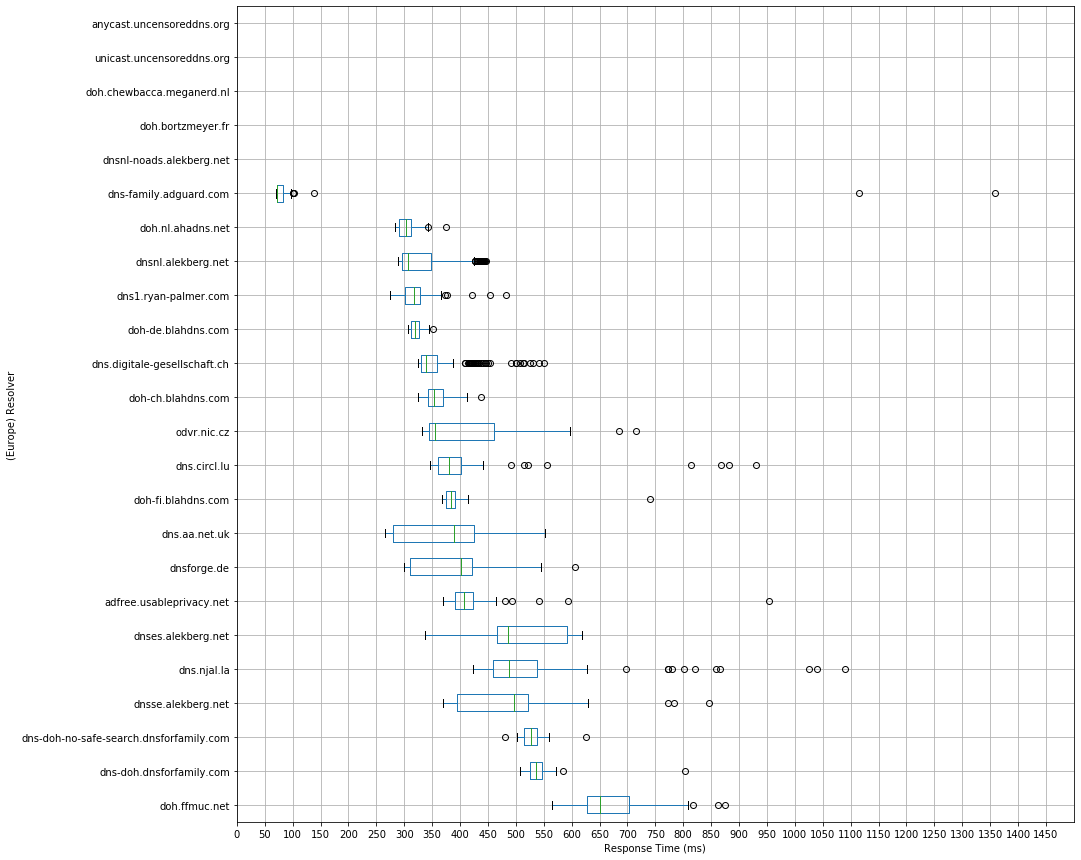

In [123]:
# Europe Boxplot, Domain: Netflix 
eur_array_of_resolvers = pd.Series(ip_europe['resolver']).unique()

eur_dict_resp_time_series={}
eur_length=len(eur_array_of_resolvers)

import warnings
warnings.filterwarnings('ignore')

eur_netflix_resp=[0]*eur_length
eur_resp_time_series=[0]*eur_length
for i in range(eur_length):
    eur_netflix_resp[i]=df[(df['resolver']==eur_array_of_resolvers[i]) & (df['domain'] == 'netflix.com')]
    eur_resp_time_series[i]=(eur_netflix_resp[i]['rtime'])
    y_axis = eur_array_of_resolvers
    eur_temp = [s.replace("https://", "") for s in y_axis]
    eur_new_list = [s.replace("/dns-query", "") for s in eur_temp]
    eur_dict_resp_time_series[eur_new_list[i]]= eur_resp_time_series[i]
eur_frame_to_plot=pd.DataFrame(eur_dict_resp_time_series)

eur_medians = eur_frame_to_plot.median()
eur_medians.sort_values(ascending=False, inplace=True)
eur_response_times = eur_frame_to_plot[eur_medians.index]

eur_boxplot=eur_response_times.boxplot(vert=False,figsize=(15,15),showfliers=True)

xl = 1500
plt.xlim(0,xl)
plt.xlabel('Response Time (ms)')
plt.ylabel('(Europe) Resolver')
plt.xticks(np.arange(0, xl, step=50))
plt.show()

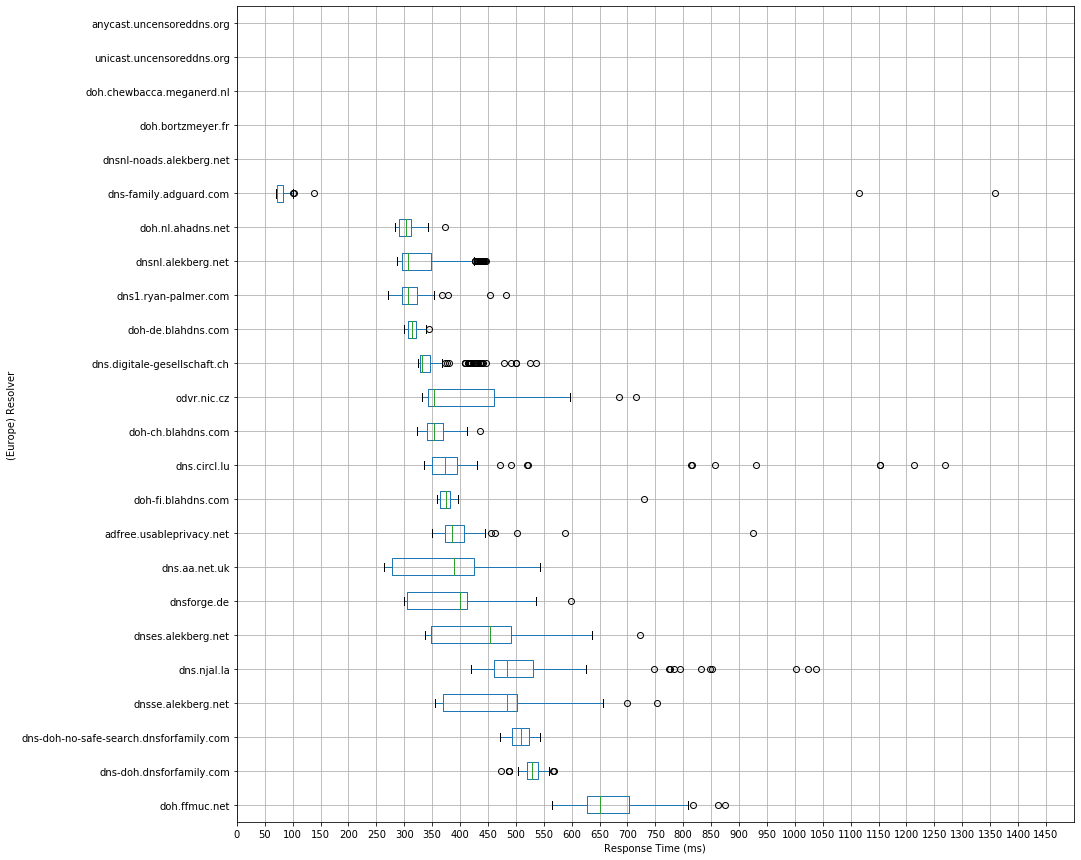

In [124]:
# Europe Boxplot, Domain: Google 
eur_array_of_resolvers = pd.Series(ip_europe['resolver']).unique()

eur_dict_resp_time_series={}
eur_length=len(eur_array_of_resolvers)

import warnings
warnings.filterwarnings('ignore')

eur_google_resp=[0]*eur_length
eur_resp_time_series=[0]*eur_length
for i in range(eur_length):
    eur_google_resp[i]=df[(df['resolver']==eur_array_of_resolvers[i]) & (df['domain'] == 'google.com')]
    eur_resp_time_series[i]=(eur_google_resp[i]['rtime'])
    y_axis = eur_array_of_resolvers
    eur_temp = [s.replace("https://", "") for s in y_axis]
    eur_new_list = [s.replace("/dns-query", "") for s in eur_temp]
    eur_dict_resp_time_series[eur_new_list[i]]= eur_resp_time_series[i]
eur_frame_to_plot=pd.DataFrame(eur_dict_resp_time_series)

eur_medians = eur_frame_to_plot.median()
eur_medians.sort_values(ascending=False, inplace=True)
eur_response_times = eur_frame_to_plot[eur_medians.index]

eur_boxplot=eur_response_times.boxplot(vert=False,figsize=(15,15),showfliers=True)

xl = 1500
plt.xlim(0,xl)
plt.xlabel('Response Time (ms)')
plt.ylabel('(Europe) Resolver')
plt.xticks(np.arange(0, xl, step=50))
plt.show()

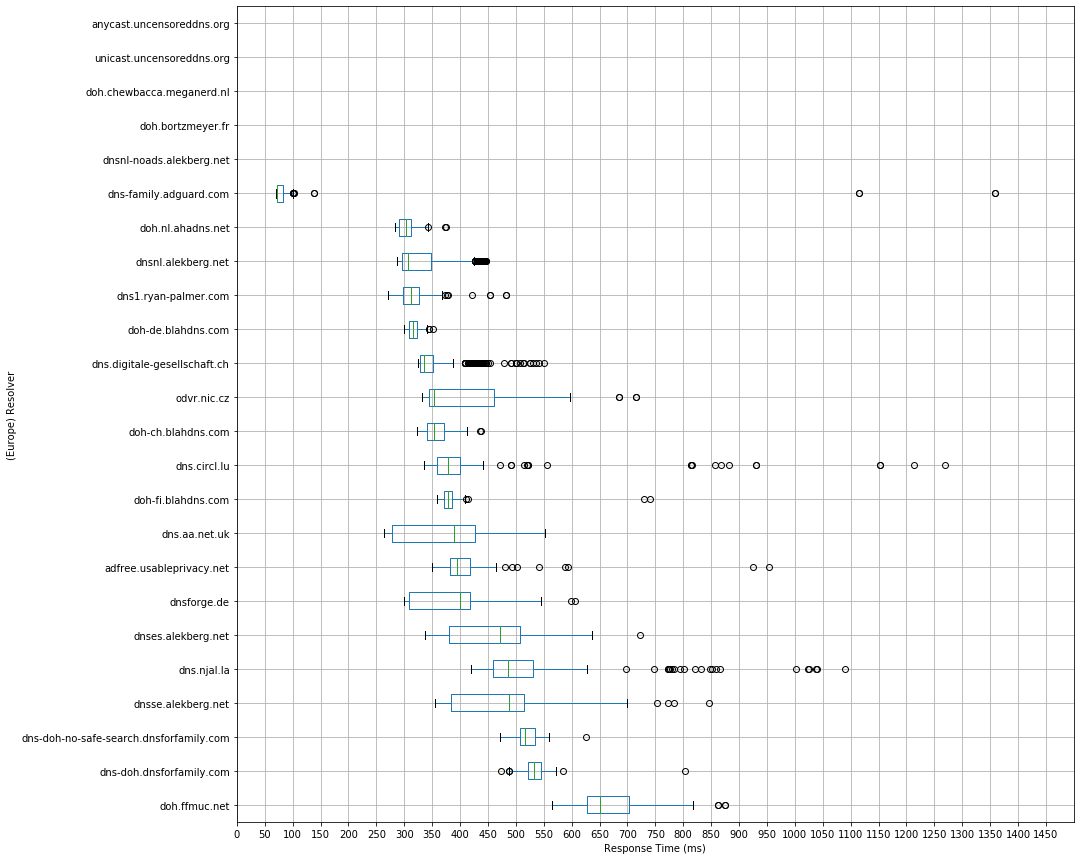

In [125]:
# Europe Boxplot, Domains: Google and Netflix
eur_array_of_resolvers = pd.Series(ip_europe['resolver']).unique()

eur_dict_resp_time_series={}
eur_length=len(eur_array_of_resolvers)

import warnings
warnings.filterwarnings('ignore')

eur_both_domains_resp=[0]*eur_length
eur_resp_time_series=[0]*eur_length
for i in range(eur_length):
    eur_both_domains_resp[i]=df[(df['resolver']==eur_array_of_resolvers[i])]
    eur_resp_time_series[i]=(eur_both_domains_resp[i]['rtime'])
    y_axis = eur_array_of_resolvers
    eur_temp = [s.replace("https://", "") for s in y_axis]
    eur_new_list = [s.replace("/dns-query", "") for s in eur_temp]
    eur_dict_resp_time_series[eur_new_list[i]]= eur_resp_time_series[i]
eur_frame_to_plot=pd.DataFrame(eur_dict_resp_time_series)

eur_medians = eur_frame_to_plot.median()
eur_medians.sort_values(ascending=False, inplace=True)
eur_response_times = eur_frame_to_plot[eur_medians.index]

eur_boxplot=eur_response_times.boxplot(vert=False,figsize=(15,15),showfliers=True)

xl = 1500
plt.xlim(0,xl)
plt.xlabel('Response Time (ms)')
plt.ylabel('(Europe) Resolver')
plt.xticks(np.arange(0, xl, step=50))
plt.show()

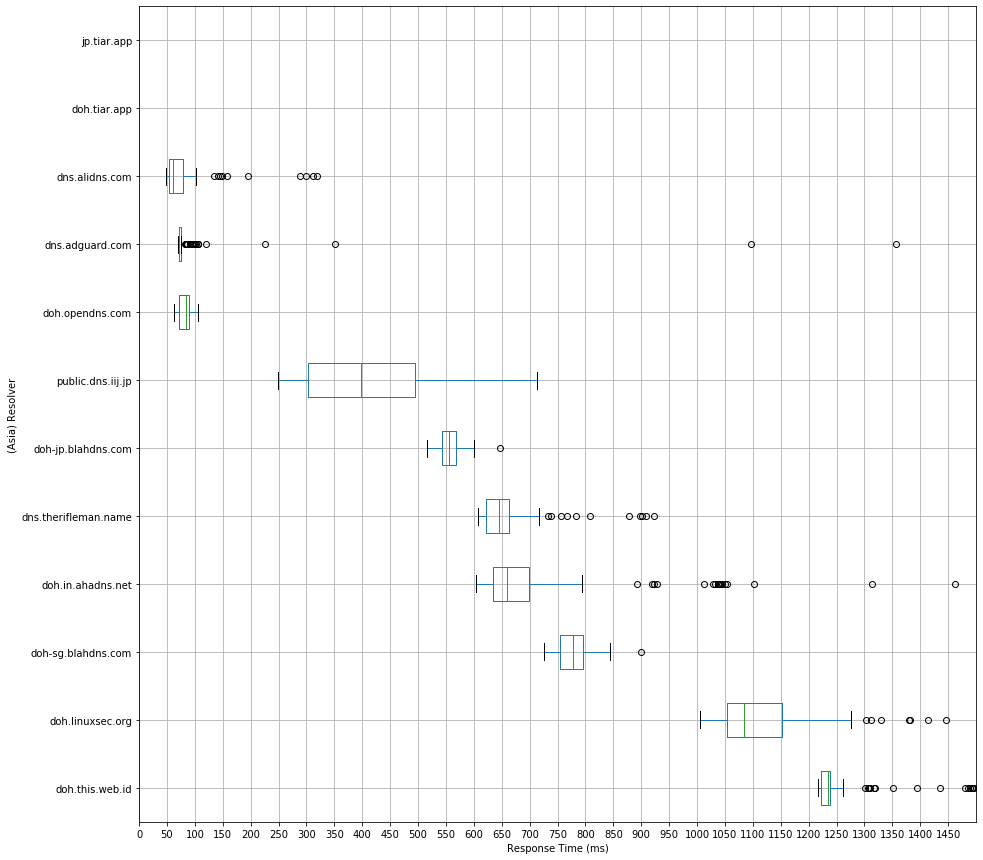

In [126]:
# Asia Boxplot, Domain: Netflix 
asia_array_of_resolvers = pd.Series(ip_asia['resolver']).unique()

asia_dict_resp_time_series={}
asia_length=len(asia_array_of_resolvers)

import warnings
warnings.filterwarnings('ignore')

asia_netflix_resp=[0]*asia_length
asia_resp_time_series=[0]*asia_length
for i in range(asia_length):
    asia_netflix_resp[i]=df[(df['resolver']==asia_array_of_resolvers[i]) & (df['domain'] == 'netflix.com')]
    asia_resp_time_series[i]=(asia_netflix_resp[i]['rtime'])
    y_axis = asia_array_of_resolvers
    asia_temp = [s.replace("https://", "") for s in y_axis]
    asia_new_list = [s.replace("/dns-query", "") for s in asia_temp]
    asia_dict_resp_time_series[asia_new_list[i]]= asia_resp_time_series[i]
asia_frame_to_plot=pd.DataFrame(asia_dict_resp_time_series)

asia_medians = asia_frame_to_plot.median()
asia_medians.sort_values(ascending=False, inplace=True)
asia_response_times = asia_frame_to_plot[asia_medians.index]

asia_boxplot=asia_response_times.boxplot(vert=False,figsize=(15,15),showfliers=True)

xl = 1500
plt.xlim(0,xl)
plt.xlabel('Response Time (ms)')
plt.ylabel('(Asia) Resolver')
plt.xticks(np.arange(0, xl, step=50))
plt.show()

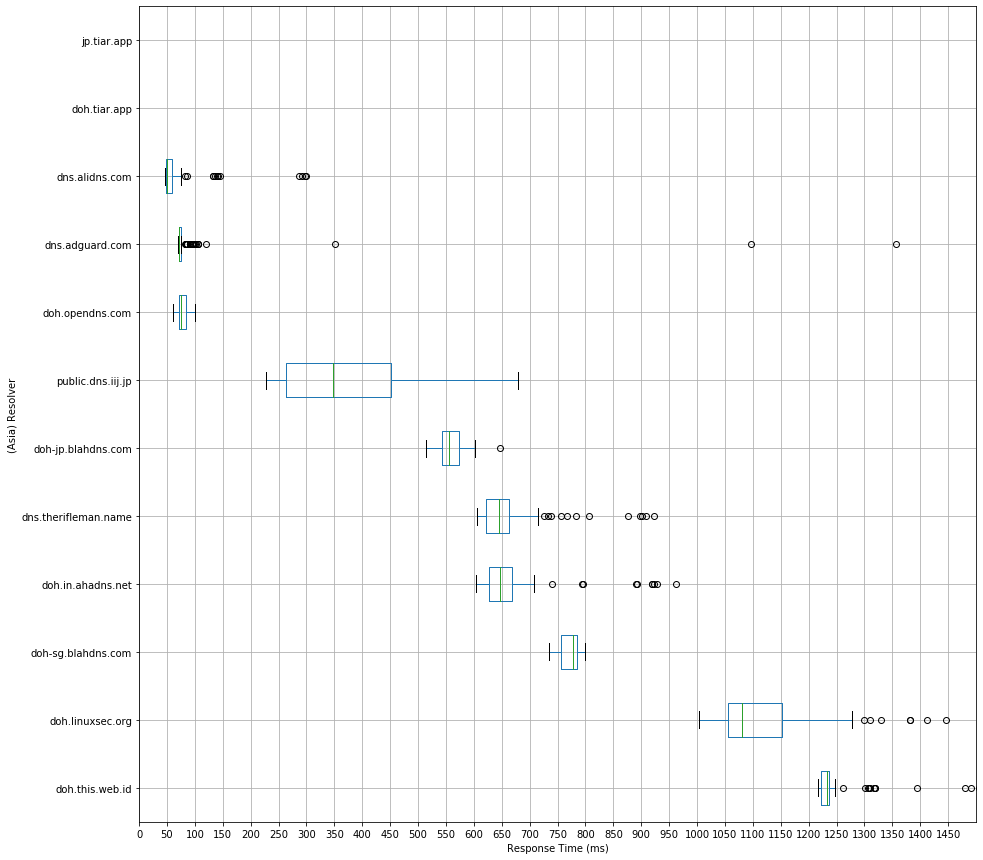

In [127]:
# Asia Boxplot, Domain: Google 
asia_array_of_resolvers = pd.Series(ip_asia['resolver']).unique()

asia_dict_resp_time_series={}
asia_length=len(asia_array_of_resolvers)

import warnings
warnings.filterwarnings('ignore')

asia_google_resp=[0]*asia_length
asia_resp_time_series=[0]*asia_length
for i in range(asia_length):
    asia_google_resp[i]=df[(df['resolver']==asia_array_of_resolvers[i]) & (df['domain'] == 'google.com')]
    asia_resp_time_series[i]=(asia_google_resp[i]['rtime'])
    y_axis = asia_array_of_resolvers
    asia_temp = [s.replace("https://", "") for s in y_axis]
    asia_new_list = [s.replace("/dns-query", "") for s in asia_temp]
    asia_dict_resp_time_series[asia_new_list[i]]= asia_resp_time_series[i]
asia_frame_to_plot=pd.DataFrame(asia_dict_resp_time_series)

asia_medians = asia_frame_to_plot.median()
asia_medians.sort_values(ascending=False, inplace=True)
asia_response_times = asia_frame_to_plot[asia_medians.index]

asia_boxplot=asia_response_times.boxplot(vert=False,figsize=(15,15),showfliers=True)

xl = 1500
plt.xlim(0,xl)
plt.xlabel('Response Time (ms)')
plt.ylabel('(Asia) Resolver')
plt.xticks(np.arange(0, xl, step=50))
plt.show()

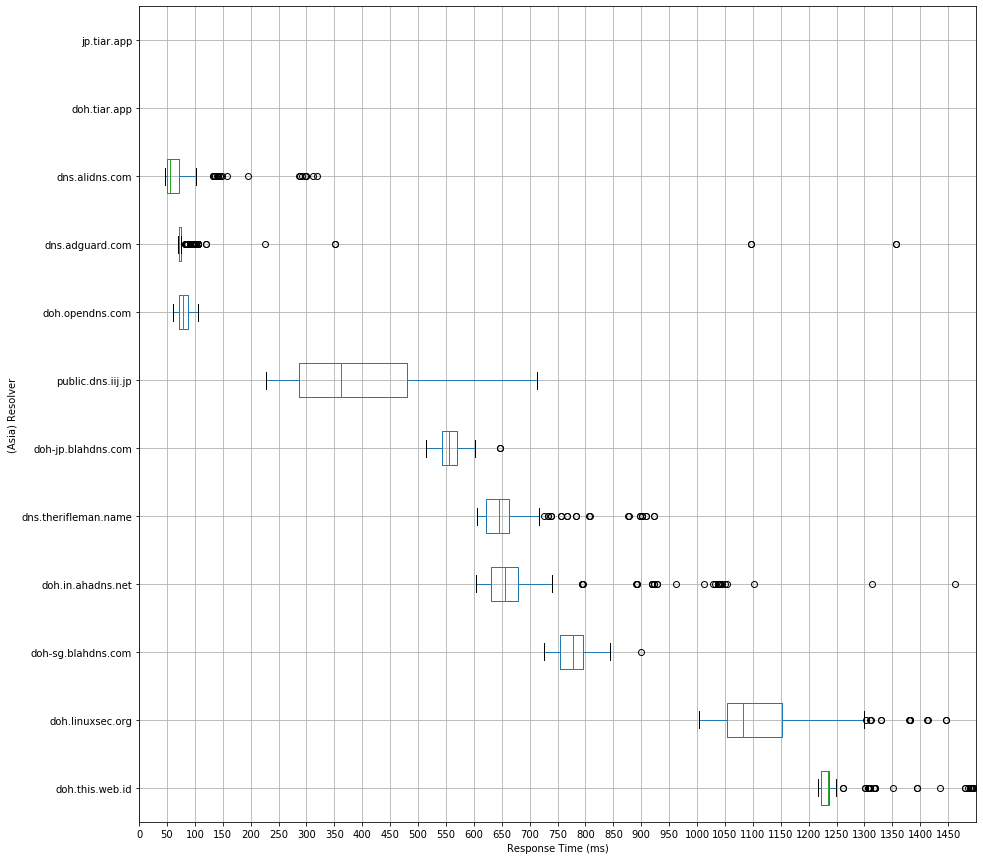

In [128]:
# Asia Boxplot, Domains: Google and Netflix
asia_array_of_resolvers = pd.Series(ip_asia['resolver']).unique()

asia_dict_resp_time_series={}
asia_length=len(asia_array_of_resolvers)

import warnings
warnings.filterwarnings('ignore')

asia_both_resp=[0]*asia_length
asia_resp_time_series=[0]*asia_length
for i in range(asia_length):
    asia_both_resp[i]=df[(df['resolver']==asia_array_of_resolvers[i])]
    asia_resp_time_series[i]=(asia_both_resp[i]['rtime'])
    y_axis = asia_array_of_resolvers
    asia_temp = [s.replace("https://", "") for s in y_axis]
    asia_new_list = [s.replace("/dns-query", "") for s in asia_temp]
    asia_dict_resp_time_series[asia_new_list[i]]= asia_resp_time_series[i]
asia_frame_to_plot=pd.DataFrame(asia_dict_resp_time_series)

asia_medians = asia_frame_to_plot.median()
asia_medians.sort_values(ascending=False, inplace=True)
asia_response_times = asia_frame_to_plot[asia_medians.index]

asia_boxplot=asia_response_times.boxplot(vert=False,figsize=(15,15),showfliers=True)

xl = 1500
plt.xlim(0,xl)
plt.xlabel('Response Time (ms)')
plt.ylabel('(Asia) Resolver')
plt.xticks(np.arange(0, xl, step=50))
plt.show()

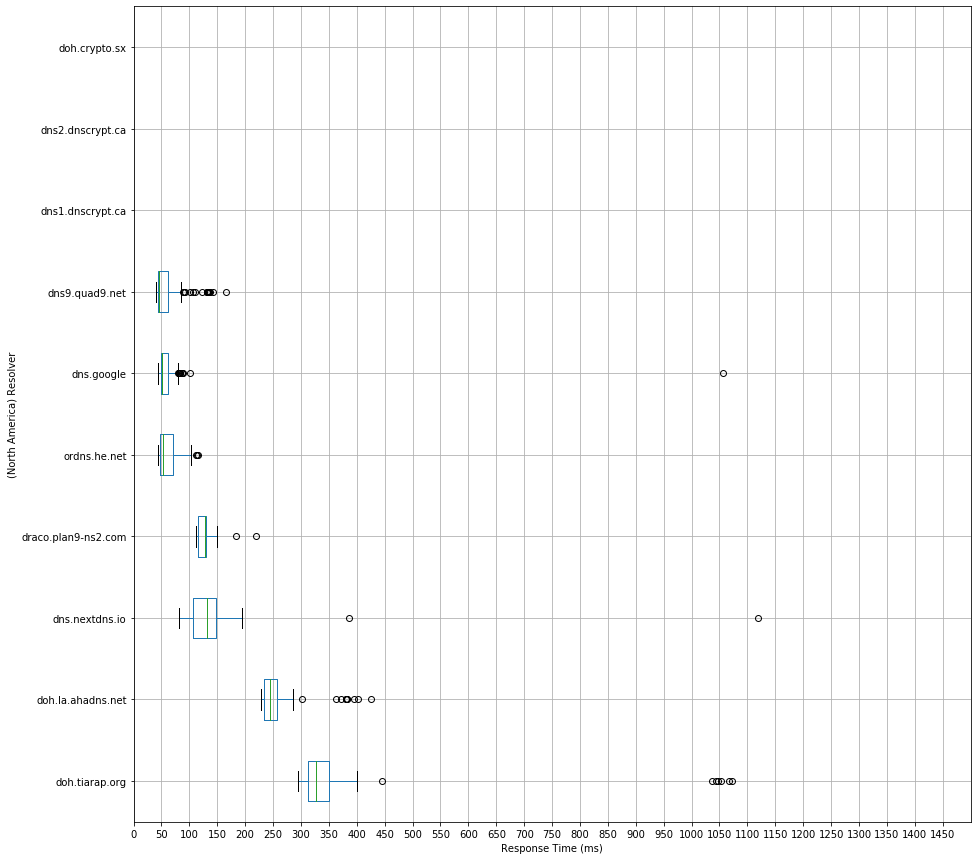

In [129]:
# North America Boxplot, Domain: Netflix 
NA_array_of_resolvers = pd.Series(ip_north_america['resolver']).unique()

NA_dict_resp_time_series={}
NA_length=len(NA_array_of_resolvers)

import warnings
warnings.filterwarnings('ignore')

NA_netflix_resp=[0]*NA_length
NA_resp_time_series=[0]*NA_length
for i in range(NA_length):
    NA_netflix_resp[i]=df[(df['resolver']==NA_array_of_resolvers[i]) & (df['domain'] == 'netflix.com')]
    NA_resp_time_series[i]=(NA_netflix_resp[i]['rtime'])
    y_axis = NA_array_of_resolvers
    NA_temp = [s.replace("https://", "") for s in y_axis]
    NA_new_list = [s.replace("/dns-query", "") for s in NA_temp]
    NA_dict_resp_time_series[NA_new_list[i]]= NA_resp_time_series[i]
NA_frame_to_plot=pd.DataFrame(NA_dict_resp_time_series)

NA_medians = NA_frame_to_plot.median()
NA_medians.sort_values(ascending=False, inplace=True)
NA_response_times = NA_frame_to_plot[NA_medians.index]

NA_boxplot=NA_response_times.boxplot(vert=False,figsize=(15,15),showfliers=True)

xl = 1500
plt.xlim(0,xl)
plt.xlabel('Response Time (ms)')
plt.ylabel('(North America) Resolver')
plt.xticks(np.arange(0, xl, step=50))
plt.show()

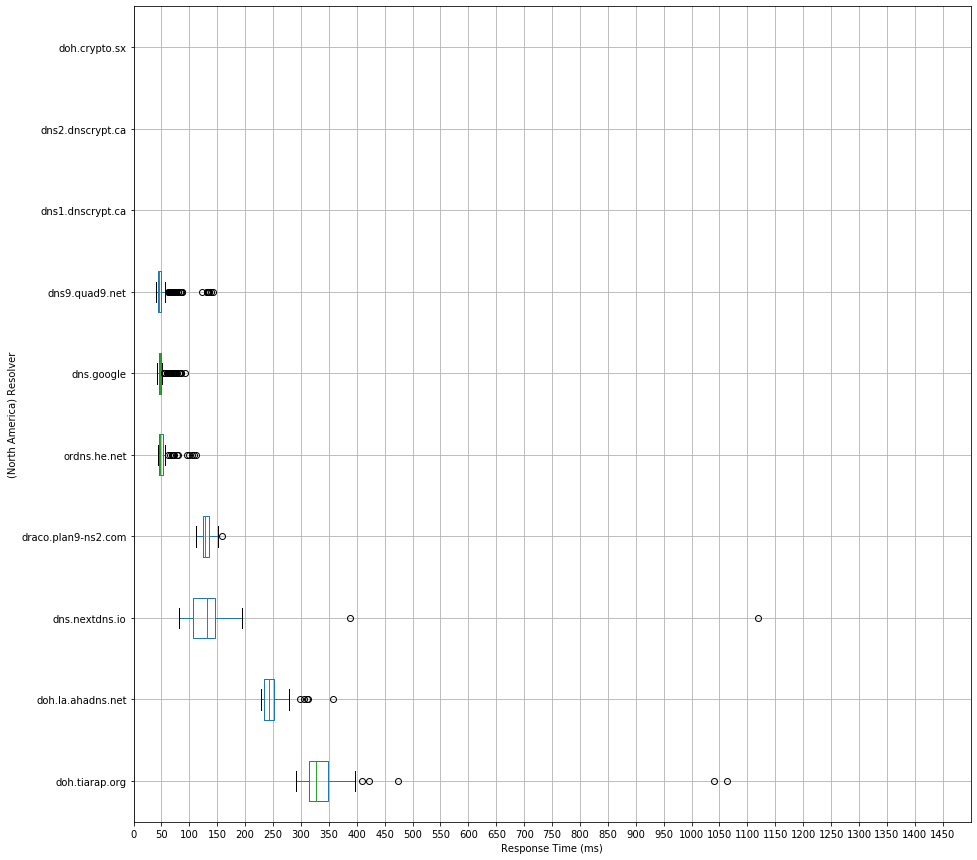

In [130]:
# North America Boxplot, Domain: Google 
NA_array_of_resolvers = pd.Series(ip_north_america['resolver']).unique()

NA_dict_resp_time_series={}
NA_length=len(NA_array_of_resolvers)

import warnings
warnings.filterwarnings('ignore')

NA_google_resp=[0]*NA_length
NA_resp_time_series=[0]*NA_length
for i in range(NA_length):
    NA_google_resp[i]=df[(df['resolver']==NA_array_of_resolvers[i]) & (df['domain'] == 'google.com')]
    NA_resp_time_series[i]=(NA_google_resp[i]['rtime'])
    y_axis = NA_array_of_resolvers
    NA_temp = [s.replace("https://", "") for s in y_axis]
    NA_new_list = [s.replace("/dns-query", "") for s in NA_temp]
    NA_dict_resp_time_series[NA_new_list[i]]= NA_resp_time_series[i]
NA_frame_to_plot=pd.DataFrame(NA_dict_resp_time_series)

NA_medians = NA_frame_to_plot.median()
NA_medians.sort_values(ascending=False, inplace=True)
NA_response_times = NA_frame_to_plot[NA_medians.index]

NA_boxplot=NA_response_times.boxplot(vert=False,figsize=(15,15),showfliers=True)

xl = 1500
plt.xlim(0,xl)
plt.xlabel('Response Time (ms)')
plt.ylabel('(North America) Resolver')
plt.xticks(np.arange(0, xl, step=50))
plt.show()

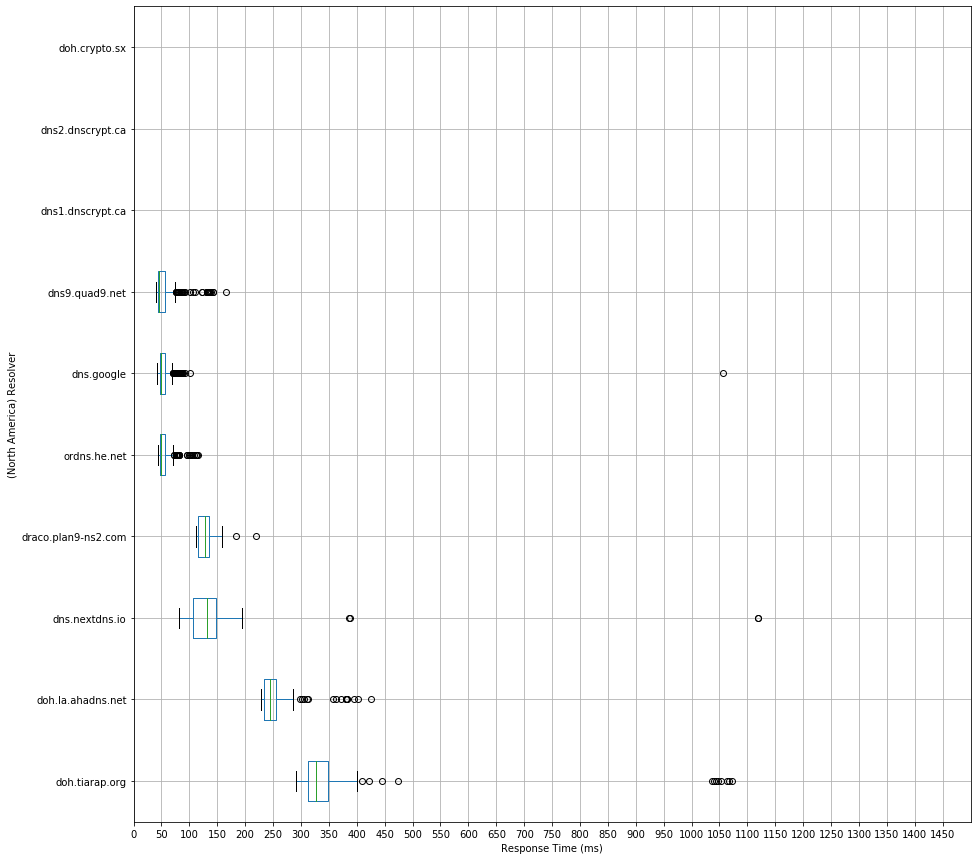

In [131]:
# North America Boxplot, Domains: Google and Netflix 
NA_array_of_resolvers = pd.Series(ip_north_america['resolver']).unique()

NA_dict_resp_time_series={}
NA_length=len(NA_array_of_resolvers)

import warnings
warnings.filterwarnings('ignore')

NA_both_resp=[0]*NA_length
NA_resp_time_series=[0]*NA_length
for i in range(NA_length):
    NA_both_resp[i]=df[(df['resolver']==NA_array_of_resolvers[i])]
    NA_resp_time_series[i]=(NA_both_resp[i]['rtime'])
    y_axis = NA_array_of_resolvers
    NA_temp = [s.replace("https://", "") for s in y_axis]
    NA_new_list = [s.replace("/dns-query", "") for s in NA_temp]
    NA_dict_resp_time_series[NA_new_list[i]]= NA_resp_time_series[i]
NA_frame_to_plot=pd.DataFrame(NA_dict_resp_time_series)

NA_medians = NA_frame_to_plot.median()
NA_medians.sort_values(ascending=False, inplace=True)
NA_response_times = NA_frame_to_plot[NA_medians.index]

NA_boxplot=NA_response_times.boxplot(vert=False,figsize=(15,15),showfliers=True)

xl = 1500
plt.xlim(0,xl)
plt.xlabel('Response Time (ms)')
plt.ylabel('(North America) Resolver')
plt.xticks(np.arange(0, xl, step=50))
plt.show()

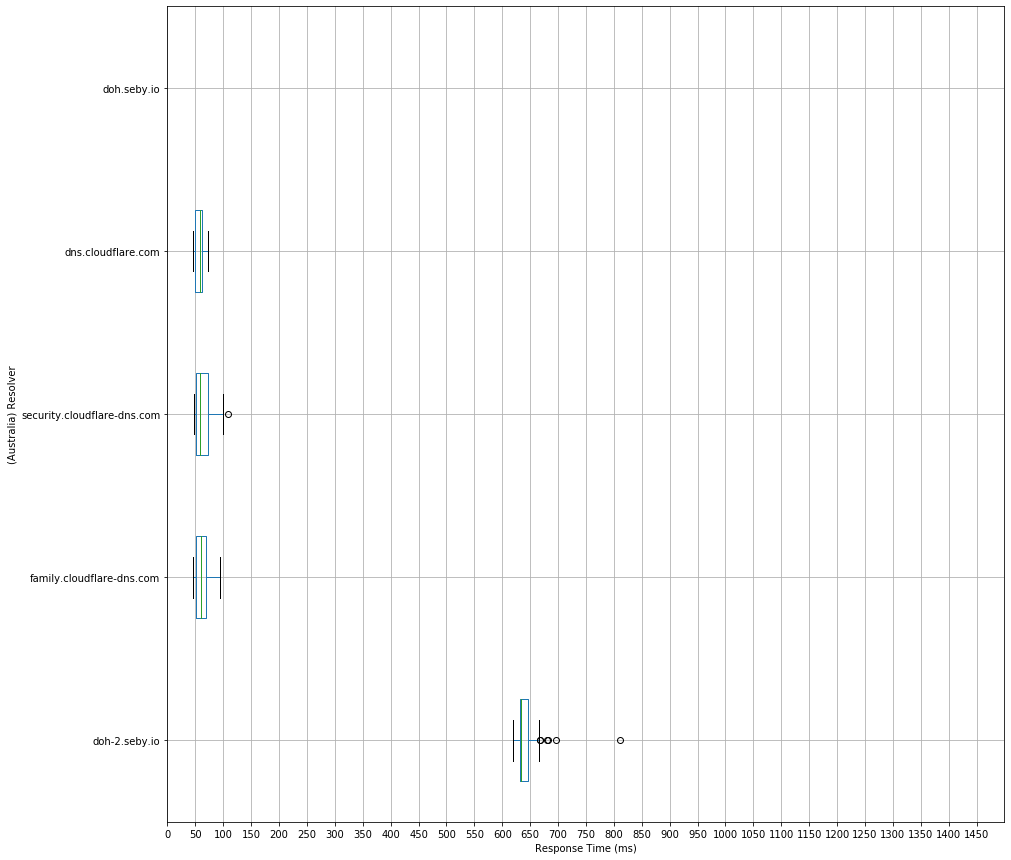

In [132]:
# Australia Boxplot, Domain: Netflix 
aus_array_of_resolvers = pd.Series(ip_australia['resolver']).unique()

aus_dict_resp_time_series={}
aus_length=len(aus_array_of_resolvers)

import warnings
warnings.filterwarnings('ignore')

aus_netflix_resp=[0]*aus_length
aus_resp_time_series=[0]*aus_length
for i in range(aus_length):
    aus_netflix_resp[i]=df[(df['resolver']==aus_array_of_resolvers[i]) & (df['domain'] == 'netflix.com')]
    aus_resp_time_series[i]=(aus_netflix_resp[i]['rtime'])
    y_axis = aus_array_of_resolvers
    aus_temp = [s.replace("https://", "") for s in y_axis]
    aus_new_list = [s.replace("/dns-query", "") for s in aus_temp]
    aus_dict_resp_time_series[aus_new_list[i]]= aus_resp_time_series[i]
aus_frame_to_plot=pd.DataFrame(aus_dict_resp_time_series)

aus_medians = aus_frame_to_plot.median()
aus_medians.sort_values(ascending=False, inplace=True)
aus_response_times = aus_frame_to_plot[aus_medians.index]

aus_boxplot=aus_response_times.boxplot(vert=False,figsize=(15,15),showfliers=True)

xl = 1500
plt.xlim(0,xl)
plt.xlabel('Response Time (ms)')
plt.ylabel('(Australia) Resolver')
plt.xticks(np.arange(0, xl, step=50))
plt.show()

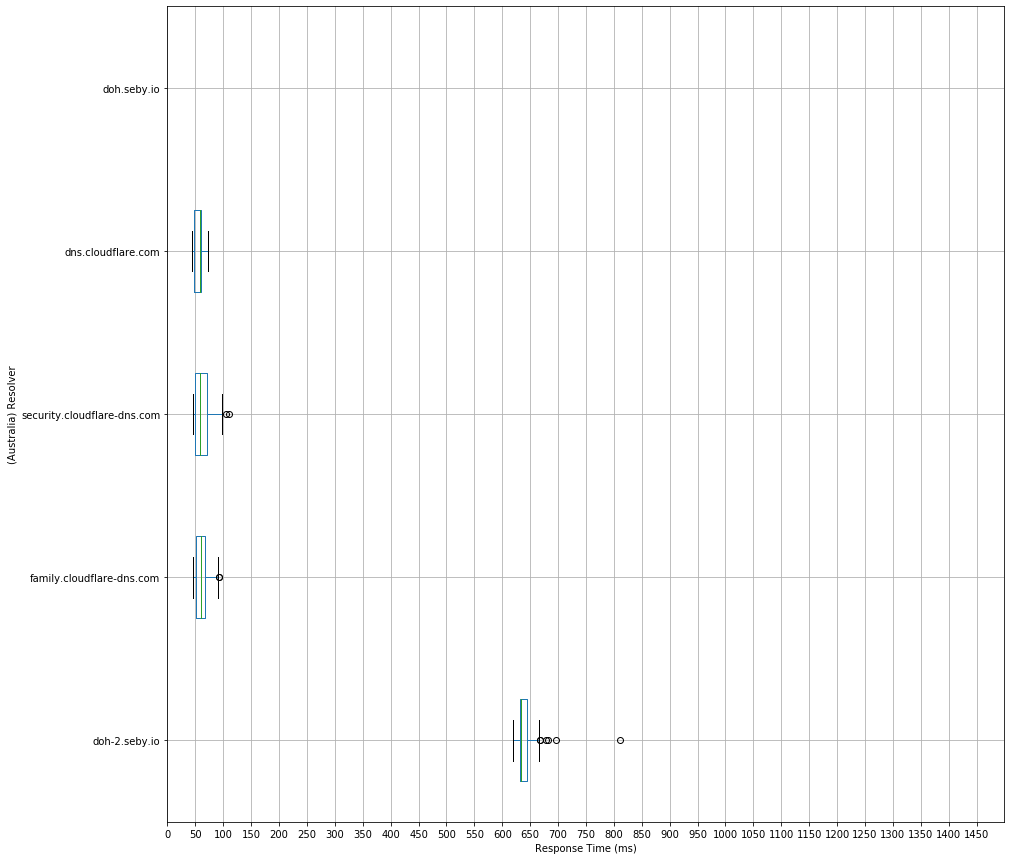

In [133]:
# Australia Boxplot, Domain: Google
aus_array_of_resolvers = pd.Series(ip_australia['resolver']).unique()

aus_dict_resp_time_series={}
aus_length=len(aus_array_of_resolvers)

import warnings
warnings.filterwarnings('ignore')

aus_google_resp=[0]*aus_length
aus_resp_time_series=[0]*aus_length
for i in range(aus_length):
    aus_google_resp[i]=df[(df['resolver']==aus_array_of_resolvers[i]) & (df['domain'] == 'google.com')]
    aus_resp_time_series[i]=(aus_google_resp[i]['rtime'])
    y_axis = aus_array_of_resolvers
    aus_temp = [s.replace("https://", "") for s in y_axis]
    aus_new_list = [s.replace("/dns-query", "") for s in aus_temp]
    aus_dict_resp_time_series[aus_new_list[i]]= aus_resp_time_series[i]
aus_frame_to_plot=pd.DataFrame(aus_dict_resp_time_series)

aus_medians = aus_frame_to_plot.median()
aus_medians.sort_values(ascending=False, inplace=True)
aus_response_times = aus_frame_to_plot[aus_medians.index]

aus_boxplot=aus_response_times.boxplot(vert=False,figsize=(15,15),showfliers=True)

xl = 1500
plt.xlim(0,xl)
plt.xlabel('Response Time (ms)')
plt.ylabel('(Australia) Resolver')
plt.xticks(np.arange(0, xl, step=50))
plt.show()

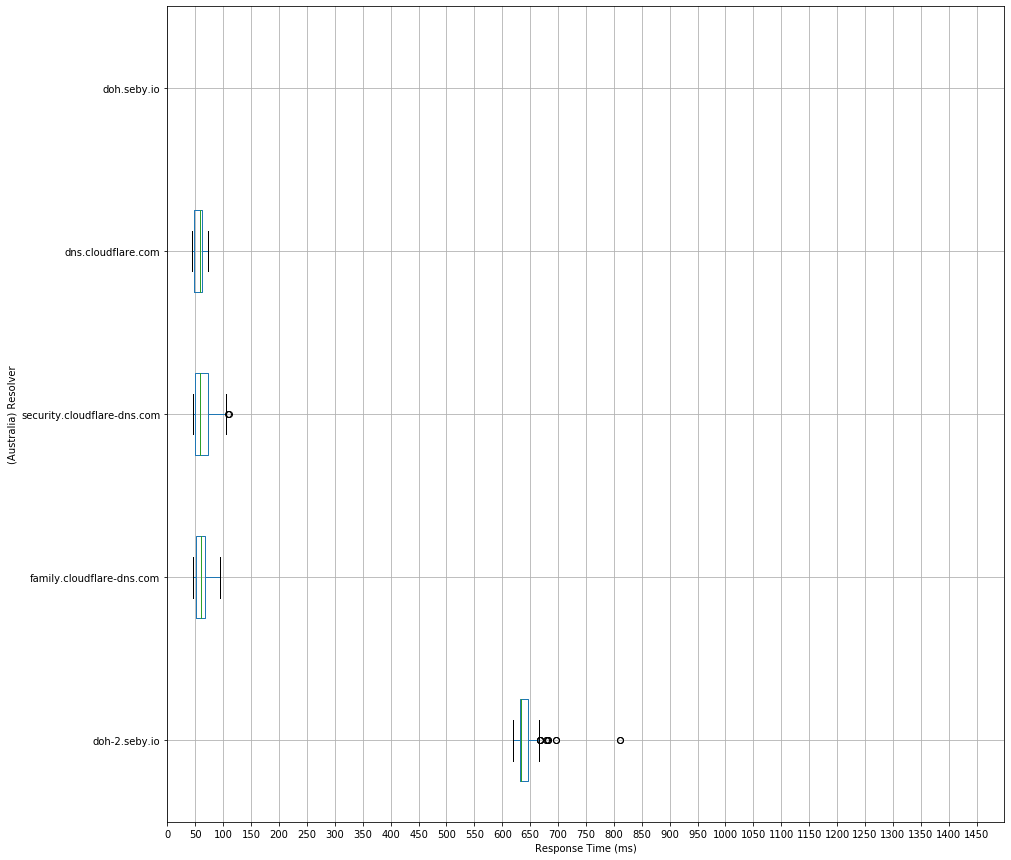

In [134]:
# Australia Boxplot, Domains: Google and Netflix
aus_array_of_resolvers = pd.Series(ip_australia['resolver']).unique()

aus_dict_resp_time_series={}
aus_length=len(aus_array_of_resolvers)

import warnings
warnings.filterwarnings('ignore')

aus_both_resp=[0]*aus_length
aus_resp_time_series=[0]*aus_length
for i in range(aus_length):
    aus_both_resp[i]=df[(df['resolver']==aus_array_of_resolvers[i])]
    aus_resp_time_series[i]=(aus_both_resp[i]['rtime'])
    y_axis = aus_array_of_resolvers
    aus_temp = [s.replace("https://", "") for s in y_axis]
    aus_new_list = [s.replace("/dns-query", "") for s in aus_temp]
    aus_dict_resp_time_series[aus_new_list[i]]= aus_resp_time_series[i]
aus_frame_to_plot=pd.DataFrame(aus_dict_resp_time_series)

aus_medians = aus_frame_to_plot.median()
aus_medians.sort_values(ascending=False, inplace=True)
aus_response_times = aus_frame_to_plot[aus_medians.index]

aus_boxplot=aus_response_times.boxplot(vert=False,figsize=(15,15),showfliers=True)

xl = 1500
plt.xlim(0,xl)
plt.xlabel('Response Time (ms)')
plt.ylabel('(Australia) Resolver')
plt.xticks(np.arange(0, xl, step=50))
plt.show()